In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path
from datetime import timedelta

In [18]:
data_path = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/uno_pi_cc_hnorm_unit_aug/test/12673/real_time.csv"
result_path = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/uno_pi_cc_hnorm_unit_aug/test/12673"
result_path = Path(result_path)

In [19]:
bmax_path = "/home/mgjeon/space/workspace/base_important/uno_pi_cc_hnorm_1_unit_aug_ccc_square/test/12673/real_time.csv"
df_bmax = pd.read_csv(bmax_path)

In [20]:
flare_path = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/12673_goes_flare_list.csv"
flares = pd.read_csv(flare_path)

In [21]:
flares

,event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum
0,2017-09-04 05:36:00,2017-09-04 05:49:00,2017-09-04 06:05:00,M1.2,12673
1,2017-09-04 15:11:00,2017-09-04 15:30:00,2017-09-04 15:33:00,M1.5,12673
2,2017-09-04 18:46:00,2017-09-04 19:37:00,2017-09-04 19:52:00,M1.7,12673
3,2017-09-04 19:59:00,2017-09-04 20:02:00,2017-09-04 20:06:00,M1.5,12673
4,2017-09-04 20:28:00,2017-09-04 20:33:00,2017-09-04 20:37:00,M5.5,12673
5,2017-09-04 22:10:00,2017-09-04 22:14:00,2017-09-04 22:19:00,M2.1,12673
6,2017-09-05 01:03:00,2017-09-05 01:08:00,2017-09-05 01:11:00,M4.2,12673
7,2017-09-05 04:33:00,2017-09-05 04:53:00,2017-09-05 05:07:00,M3.2,12673
8,2017-09-05 06:33:00,2017-09-05 06:40:00,2017-09-05 06:43:00,M3.8,12673
9,2017-09-05 17:37:00,2017-09-05 17:43:00,2017-09-05 17:51:00,M2.3,12673


In [22]:
peaktime = flares['event_peaktime'].apply(pd.to_datetime)
starttime = flares['event_starttime'].apply(pd.to_datetime)
endtime = flares['event_endtime'].apply(pd.to_datetime)
goescls = flares['fl_goescls']

In [23]:
df = pd.read_csv(data_path)

In [24]:
c_vec_mean = df['C_vec'].mean()
c_cs_mean = df['C_cs'].mean()
e_n_mean = df["E_n_prime"].mean()
e_m_mean = df["E_m_prime"].mean()
eps_mean = df["eps"].mean()
l2_err_mean = df['rel_l2_err'].mean()

print()
print(f"avg C_vec     : {c_vec_mean:.2f}")
print(f"avg C_cs      : {c_cs_mean:.2f}")
print(f"avg E_n_prime : {e_n_mean:.2f}")
print(f"avg E_m_prime : {e_m_mean:.2f}")
print(f"avg eps       : {eps_mean:.2f}")
print(f"avg rel_l2_err    : {l2_err_mean:.2f}")
print()


avg C_vec     : 0.95
avg C_cs      : 0.77
avg E_n_prime : 0.53
avg E_m_prime : 0.01
avg eps       : 1.06
avg rel_l2_err    : 0.31



In [25]:
dV = (df['dV_1e23'].iloc[0]*1e-10)
dV

1.9916740609361494e-10

In [26]:
energy_factor = dV/(8*np.pi)
energy_factor

7.924619295647423e-12

In [27]:
df['pred_E_unit'].iloc[0] * energy_factor

0.957839820026139

In [28]:
df['pred_E_1e33'].iloc[0]

0.957839820026139

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


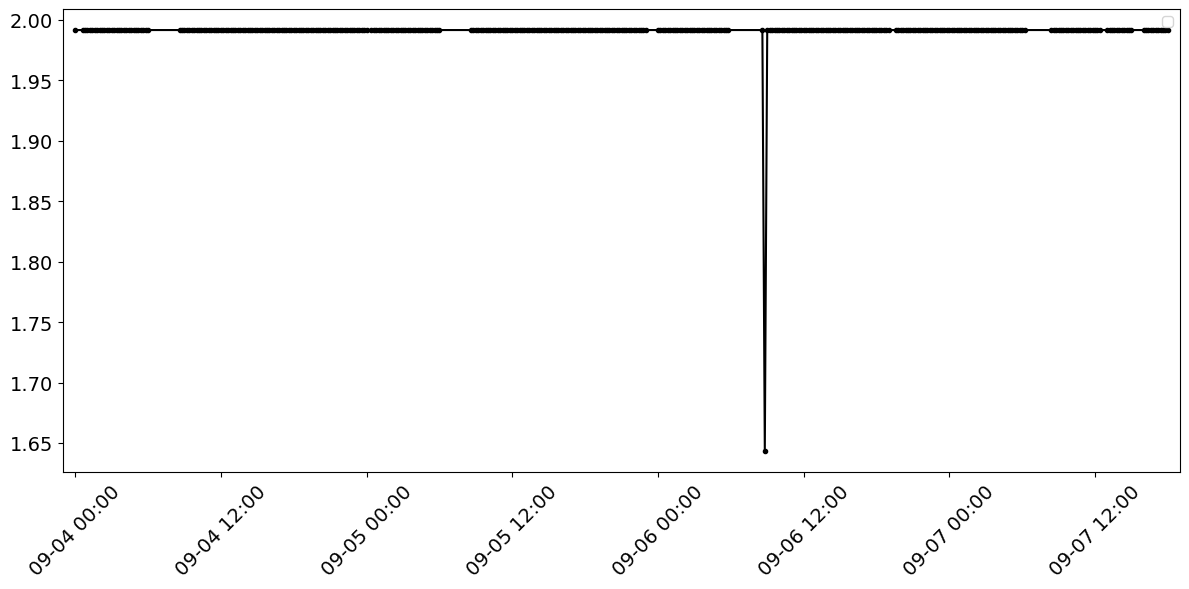

In [29]:
title = "NOAA 12673"
ylim = None

obstime = df['obstime'].apply(pd.to_datetime)
dV_1e23 = df['dV_1e23']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, dV_1e23,'o', **marker_style, color='black')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([obstime.iloc[0]-timedelta(minutes=60), obstime.iloc[-1]+timedelta(minutes=60)])

# ax.set_xlabel('time (hour)',**text_style)
# ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# labeltime = timedelta(minutes=30)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
#     ax.axvline(pt, linestyle='--', zorder=0, color='black')
#     ax.annotate(cl[0], xy=(et+labeltime, 1.25))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy.png', dpi=600)

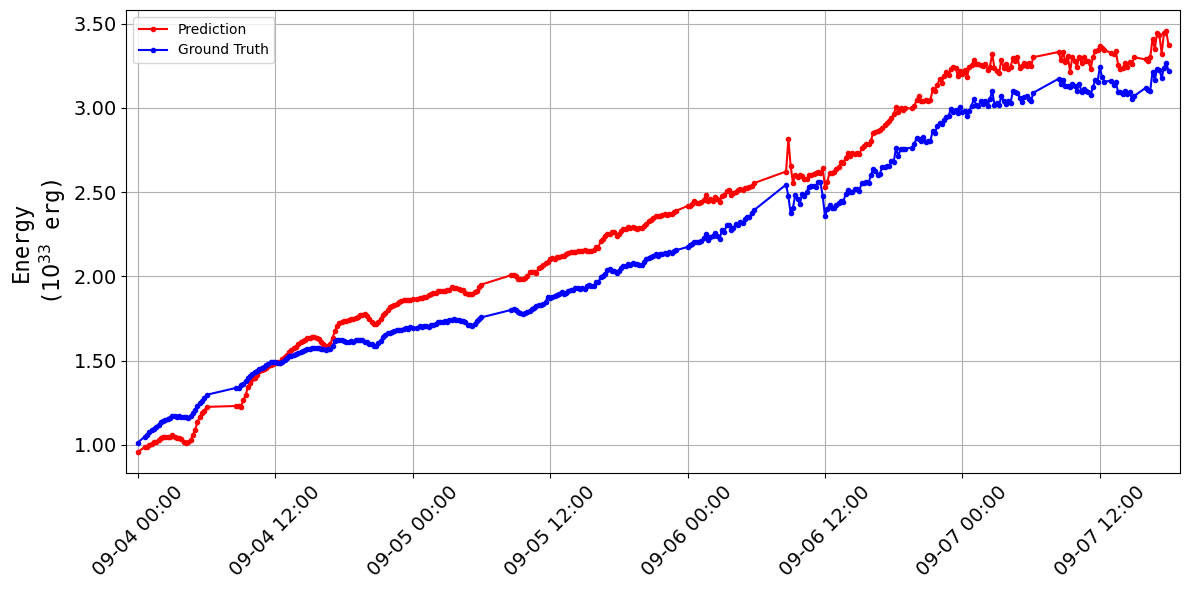

In [31]:
title = "NOAA 12673"
ylim = None

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_1e33']
ref_E = df['ref_E_1e33']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([obstime.iloc[0]-timedelta(minutes=60), obstime.iloc[-1]+timedelta(minutes=60)])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# labeltime = timedelta(minutes=30)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
#     ax.axvline(pt, linestyle='--', zorder=0, color='black')
#     ax.annotate(cl[0], xy=(et+labeltime, 1.25))
plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy.png', dpi=600)

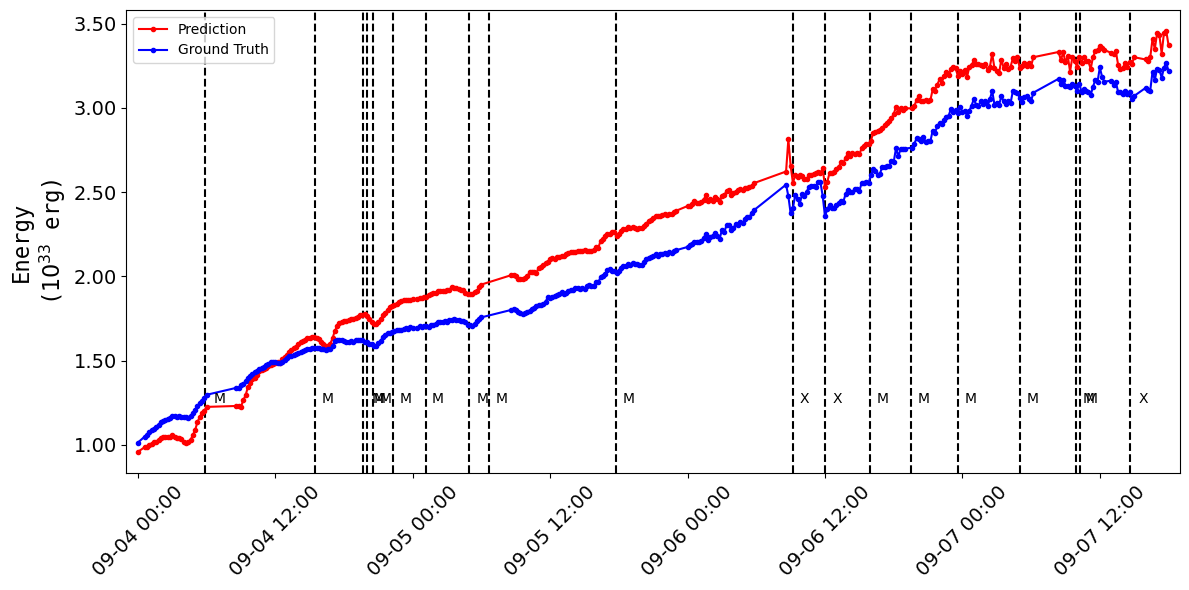

In [16]:
title = "NOAA 12673"
ylim = None

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_1e33']
ref_E = df['ref_E_1e33']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([obstime.iloc[0]-timedelta(minutes=60), obstime.iloc[-1]+timedelta(minutes=60)])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

labeltime = timedelta(minutes=30)
for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    ax.axvline(pt, linestyle='--', zorder=0, color='black')
    ax.annotate(cl[0], xy=(et+labeltime, 1.25))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy.png', dpi=600)

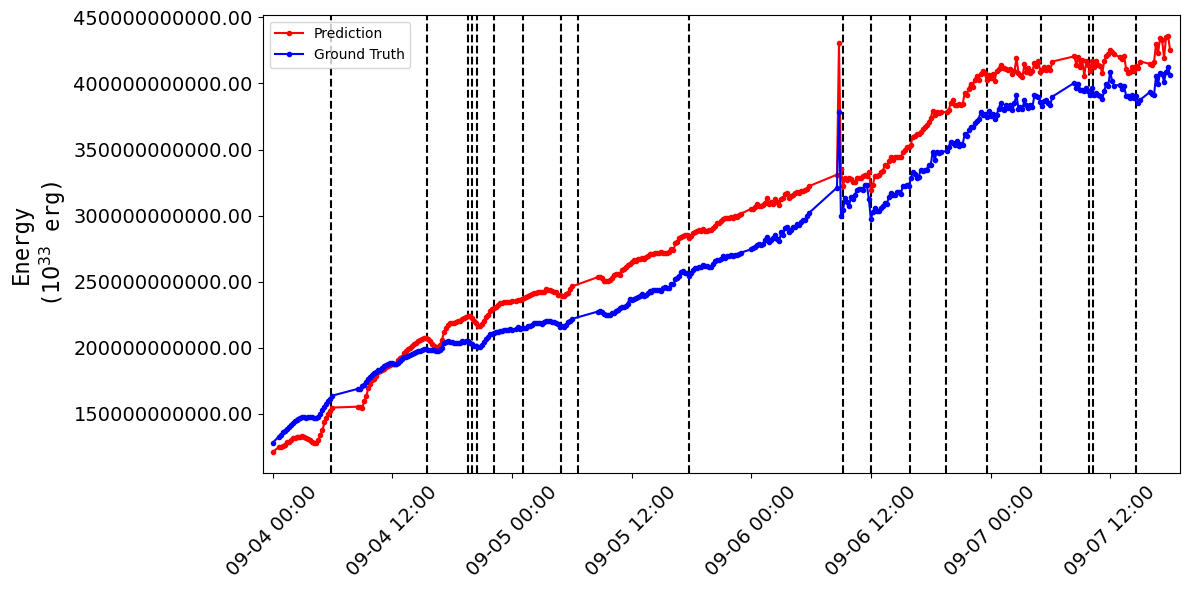

In [15]:
title = "NOAA 12673"
ylim = None

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_unit']
ref_E = df['ref_E_unit']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([obstime.iloc[0]-timedelta(minutes=60), obstime.iloc[-1]+timedelta(minutes=60)])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

labeltime = timedelta(minutes=30)
for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    ax.axvline(pt, linestyle='--', zorder=0, color='black')
    ax.annotate(cl[0], xy=(et+labeltime, 1.25))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy.png', dpi=600)

In [1]:
title = "NOAA 12673"
ylim = None

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_unit'] * energy_factor
ref_E = df['ref_E_unit'] * energy_factor

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([obstime.iloc[0]-timedelta(minutes=60), obstime.iloc[-1]+timedelta(minutes=60)])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# labeltime = timedelta(minutes=30)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
#     if cl[0] == "M":
#         continue
#     ax.axvline(pt, linestyle='--', zorder=0, color='black')
#     ax.annotate(cl[0], xy=(et+labeltime, 1.25))
# plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'energy.png', dpi=600)

NameError: name 'df' is not defined

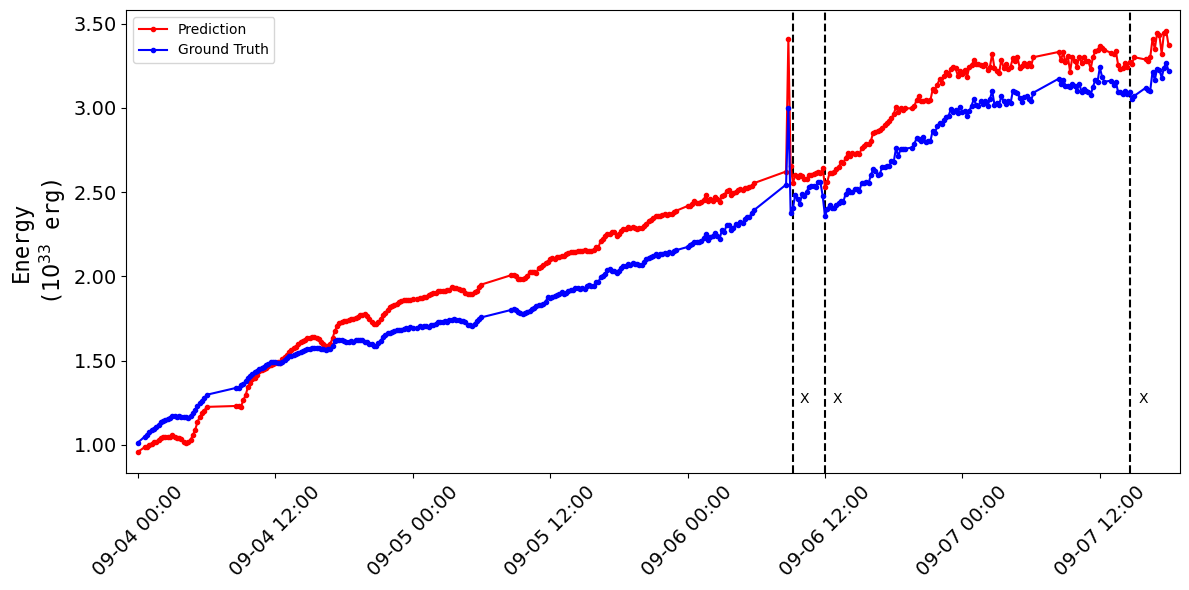

In [31]:
title = "NOAA 12673"
ylim = None

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_unit'] * energy_factor
ref_E = df['ref_E_unit'] * energy_factor

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([obstime.iloc[0]-timedelta(minutes=60), obstime.iloc[-1]+timedelta(minutes=60)])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

labeltime = timedelta(minutes=30)
for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    if cl[0] == "M":
        continue
    ax.axvline(pt, linestyle='--', zorder=0, color='black')
    ax.annotate(cl[0], xy=(et+labeltime, 1.25))
# plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'energy.png', dpi=600)

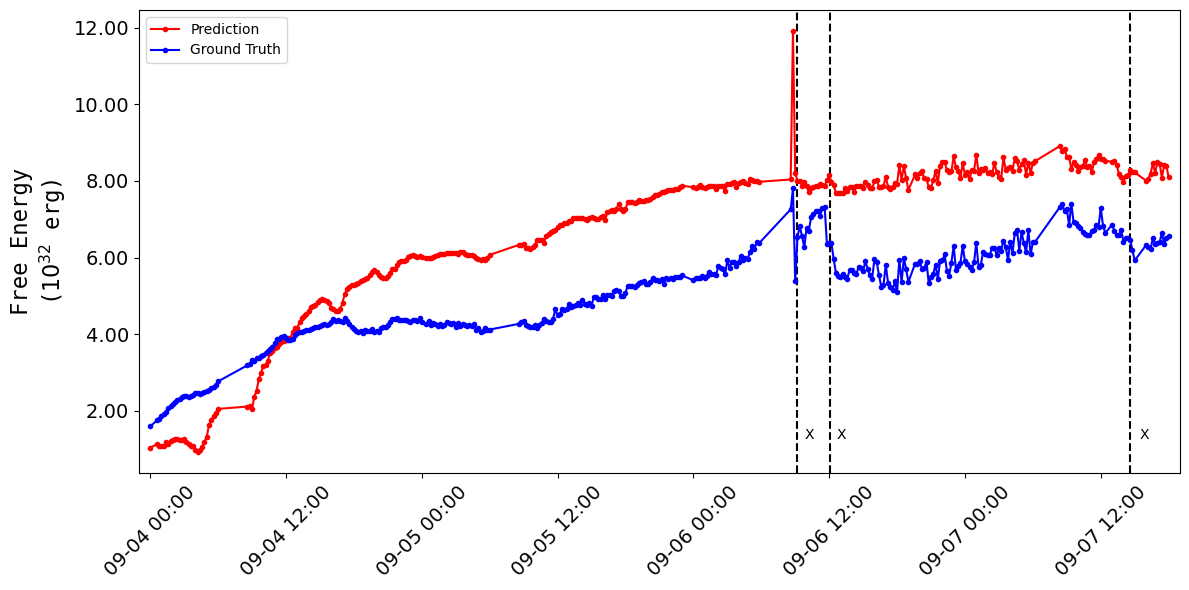

In [51]:
title = "NOAA 12673"
ylim = None

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_unit'] * energy_factor
ref_E = df['ref_E_unit'] * energy_factor
pot_E = df['pot_E_unit'] * energy_factor
pred_free_E = pred_E - pot_E
ref_free_E = ref_E - pot_E

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_free_E*10,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_free_E*10,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([obstime.iloc[0]-timedelta(minutes=60), obstime.iloc[-1]+timedelta(minutes=60)])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Free Energy\n($10^{32}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

labeltime = timedelta(minutes=30)
for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    if cl[0] == "M":
        continue
    ax.axvline(pt, linestyle='--', zorder=0, color='black')
    ax.annotate(cl[0], xy=(et+labeltime, 1.25))
# plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'free_energy.png', dpi=600)

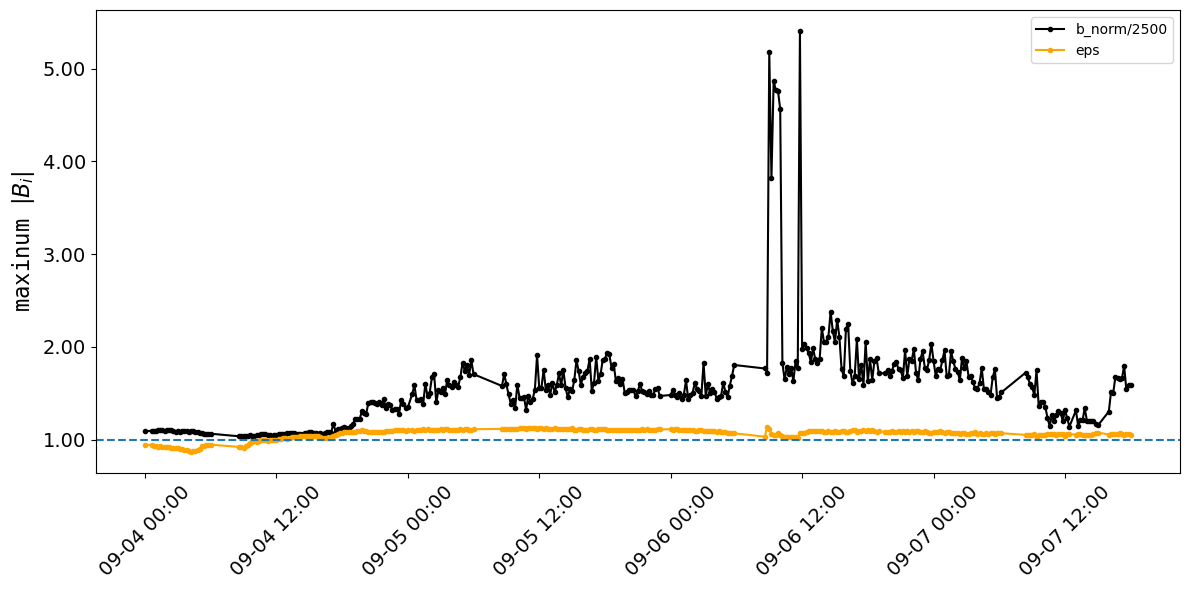

In [32]:
title = "NOAA 12673"
ylim = None

# start_time = pd.to_datetime(flares.iloc[2]['event_peaktime'])
# dt = timedelta(hours=3)

obstime = df_bmax['obstime'].apply(pd.to_datetime)
bb = df_bmax['b_norm'] / 2500
eps_obstime = df['obstime'].apply(pd.to_datetime)
eps = df['eps']
# ref_E = df['ref_E_1e33']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, bb,'o', **marker_style, color='black', label='b_norm/2500')
ax.plot(eps_obstime, eps,'o', **marker_style, color='orange', label='eps')

# ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

# ax.set_xlim([start_time-dt, start_time+dt])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('maxinum $|B_i|$',**text_style)
ax.axhline(y=1.0, linestyle='--')
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# labeltime = timedelta(seconds=10)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
# ax.axvline(peaktime.iloc[-1], linestyle='--', zorder=0, color='black')
# ax.axvspan(starttime.iloc[-1], endtime.iloc[-1], color='gray', alpha=0.2, label=goescls.iloc[-1])
    # ax.annotate(cl[0], xy=(et+labeltime, 1.22))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy_small.png', dpi=600)

In [35]:
X_flares = flares[flares['fl_goescls'] > 'X']
X_flares

,event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum
10,2017-09-06 08:57:00,2017-09-06 09:10:00,2017-09-06 09:17:00,X2.2,12673
11,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,X9.3,12673
18,2017-09-07 14:20:00,2017-09-07 14:36:00,2017-09-07 14:55:00,X1.3,12673


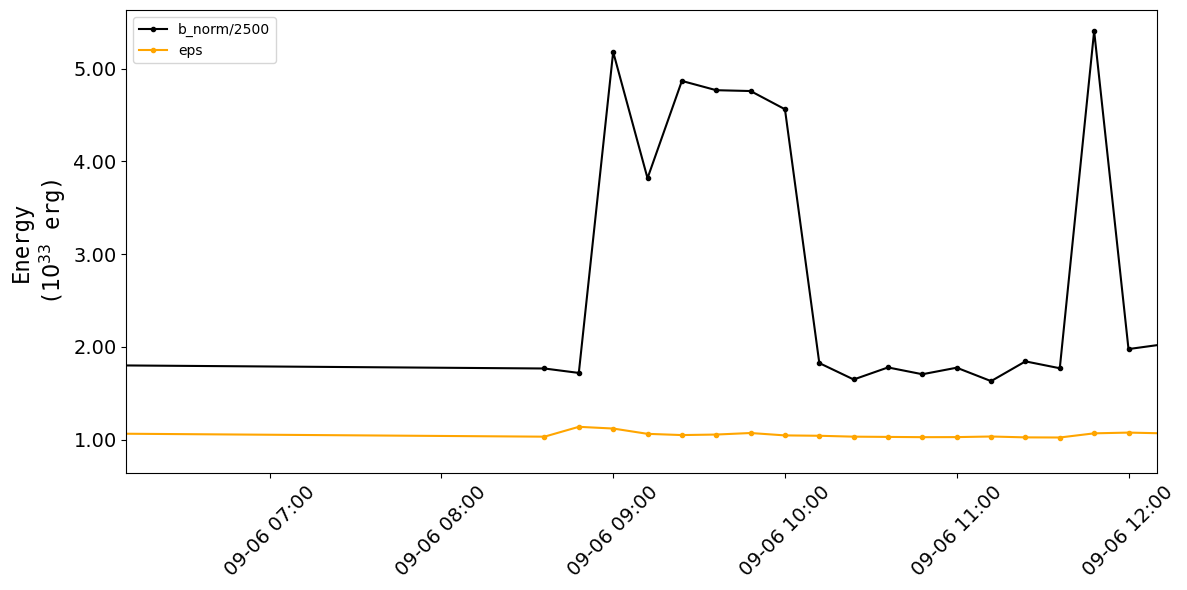

In [67]:
title = "NOAA 12673"
ylim = None

ss = X_flares.iloc[0]

pt = pd.to_datetime(ss['event_peaktime'])
st = pd.to_datetime(ss['event_starttime'])
et = pd.to_datetime(ss['event_endtime'])
cl = ss['fl_goescls']

dt = timedelta(hours=3)

obstime = df_bmax['obstime'].apply(pd.to_datetime)
bb = df_bmax['b_norm'] / 2500
eps_obstime = df['obstime'].apply(pd.to_datetime)
eps = df['eps']
# ref_E = df['ref_E_1e33']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, bb,'o', **marker_style, color='black', label='b_norm/2500')
ax.plot(eps_obstime, eps,'o', **marker_style, color='orange', label='eps')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([pt-dt, pt+dt])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# ax.set_yscale('log')

# labeltime = timedelta(seconds=10)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
# ax.axvline(pt, linestyle='--', zorder=0, color='black')
# ax.axvspan(st, et, color='gray', alpha=0.2, label=cl)
    # ax.annotate(cl[0], xy=(et+labeltime, 1.22))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy_small.png', dpi=600)

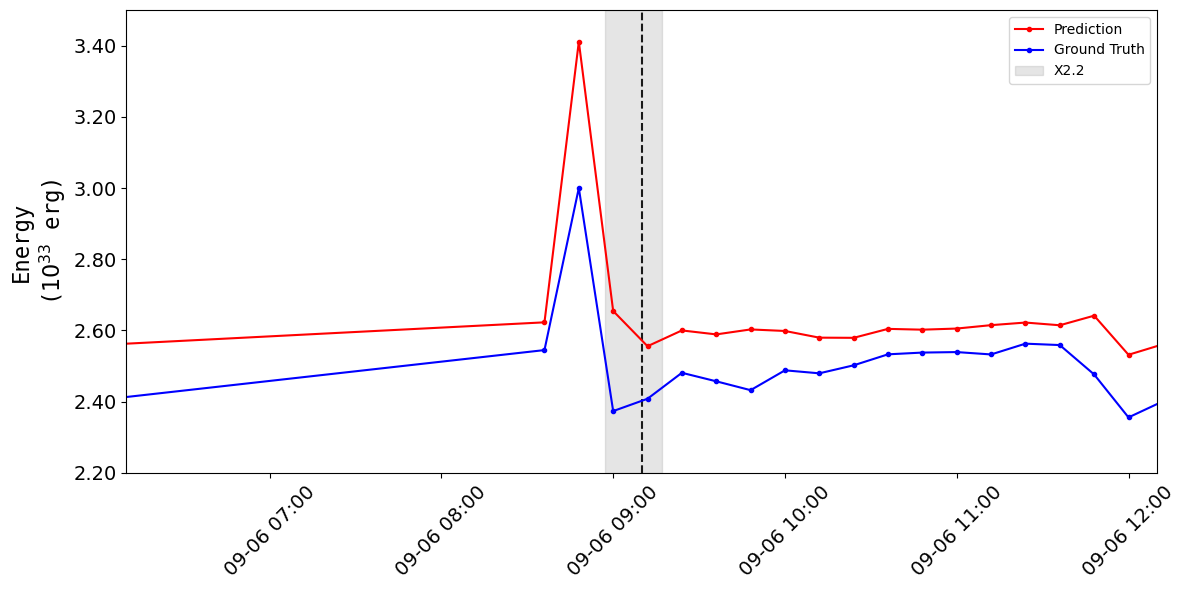

In [49]:
title = "NOAA 12673"
ylim = [2.2, 3.5]

ss = X_flares.iloc[0]

pt = pd.to_datetime(ss['event_peaktime'])
st = pd.to_datetime(ss['event_starttime'])
et = pd.to_datetime(ss['event_endtime'])
cl = ss['fl_goescls']

dt = timedelta(hours=3)

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_unit'] * energy_factor
ref_E = df['ref_E_unit'] * energy_factor

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([pt-dt, pt+dt])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# labeltime = timedelta(seconds=10)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
ax.axvline(pt, linestyle='--', zorder=0, color='black')
ax.axvspan(st, et, color='gray', alpha=0.2, label=cl)
    # ax.annotate(cl[0], xy=(et+labeltime, 1.22))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy_small.png', dpi=600)

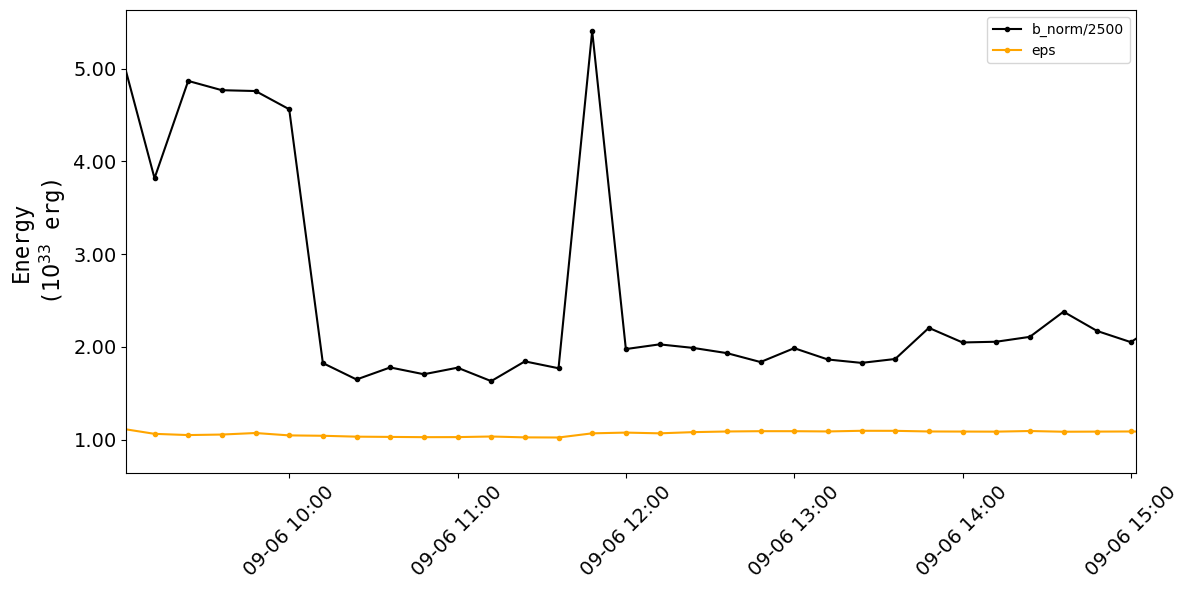

In [66]:
title = "NOAA 12673"
ylim = None

ss = X_flares.iloc[1]

pt = pd.to_datetime(ss['event_peaktime'])
st = pd.to_datetime(ss['event_starttime'])
et = pd.to_datetime(ss['event_endtime'])
cl = ss['fl_goescls']

dt = timedelta(hours=3)

obstime = df_bmax['obstime'].apply(pd.to_datetime)
bb = df_bmax['b_norm'] / 2500
eps_obstime = df['obstime'].apply(pd.to_datetime)
eps = df['eps']
# ref_E = df['ref_E_1e33']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, bb,'o', **marker_style, color='black', label='b_norm/2500')
ax.plot(eps_obstime, eps,'o', **marker_style, color='orange', label='eps')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([pt-dt, pt+dt])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# ax.set_yscale('log')

# labeltime = timedelta(seconds=10)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
# ax.axvline(pt, linestyle='--', zorder=0, color='black')
# ax.axvspan(st, et, color='gray', alpha=0.2, label=cl)
    # ax.annotate(cl[0], xy=(et+labeltime, 1.22))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy_small.png', dpi=600)

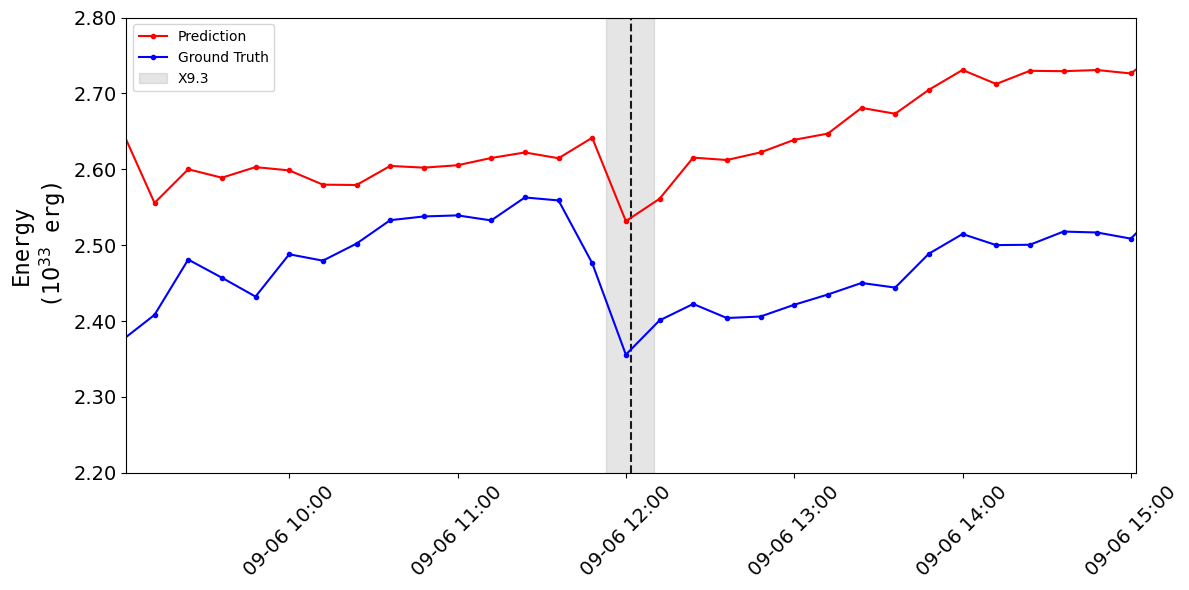

In [47]:
title = "NOAA 12673"
ylim = [2.2, 2.8]

ss = X_flares.iloc[1]

pt = pd.to_datetime(ss['event_peaktime'])
st = pd.to_datetime(ss['event_starttime'])
et = pd.to_datetime(ss['event_endtime'])
cl = ss['fl_goescls']

dt = timedelta(hours=3)

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_unit'] * energy_factor
ref_E = df['ref_E_unit'] * energy_factor

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([pt-dt, pt+dt])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# labeltime = timedelta(seconds=10)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
ax.axvline(pt, linestyle='--', zorder=0, color='black')
ax.axvspan(st, et, color='gray', alpha=0.2, label=cl)
    # ax.annotate(cl[0], xy=(et+labeltime, 1.22))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy_small.png', dpi=600)

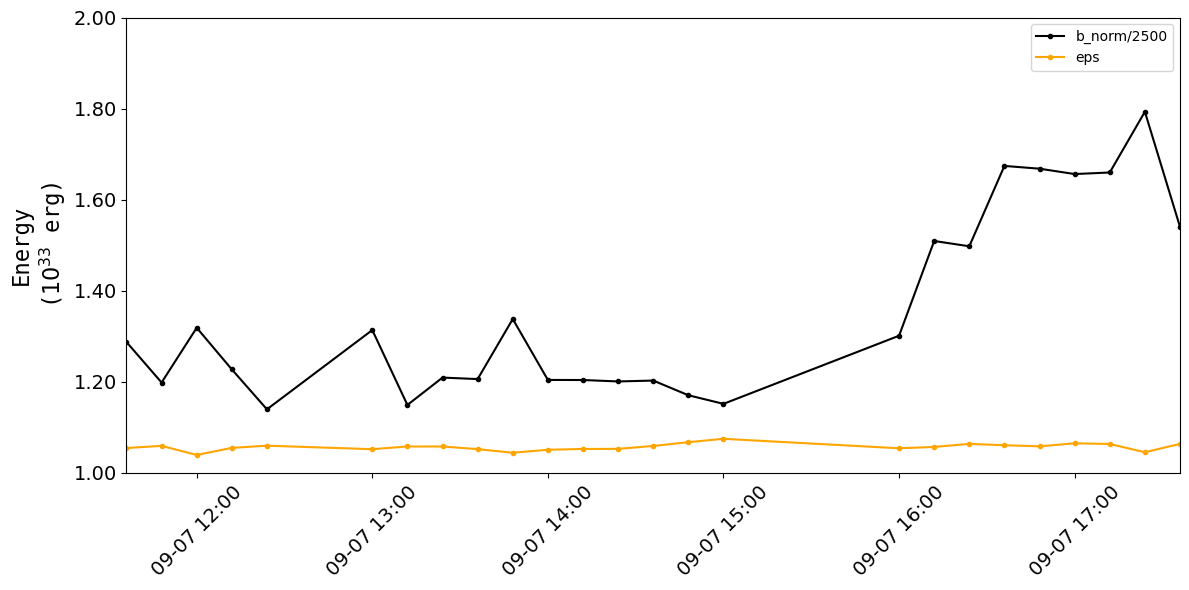

In [70]:
title = "NOAA 12673"
ylim = [1.0, 2.0]

ss = X_flares.iloc[2]

pt = pd.to_datetime(ss['event_peaktime'])
st = pd.to_datetime(ss['event_starttime'])
et = pd.to_datetime(ss['event_endtime'])
cl = ss['fl_goescls']

dt = timedelta(hours=3)

obstime = df_bmax['obstime'].apply(pd.to_datetime)
bb = df_bmax['b_norm'] / 2500
eps_obstime = df['obstime'].apply(pd.to_datetime)
eps = df['eps']
# ref_E = df['ref_E_1e33']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, bb,'o', **marker_style, color='black', label='b_norm/2500')
ax.plot(eps_obstime, eps,'o', **marker_style, color='orange', label='eps')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([pt-dt, pt+dt])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# ax.set_yscale('log')

# labeltime = timedelta(seconds=10)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
# ax.axvline(pt, linestyle='--', zorder=0, color='black')
# ax.axvspan(st, et, color='gray', alpha=0.2, label=cl)
    # ax.annotate(cl[0], xy=(et+labeltime, 1.22))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy_small.png', dpi=600)

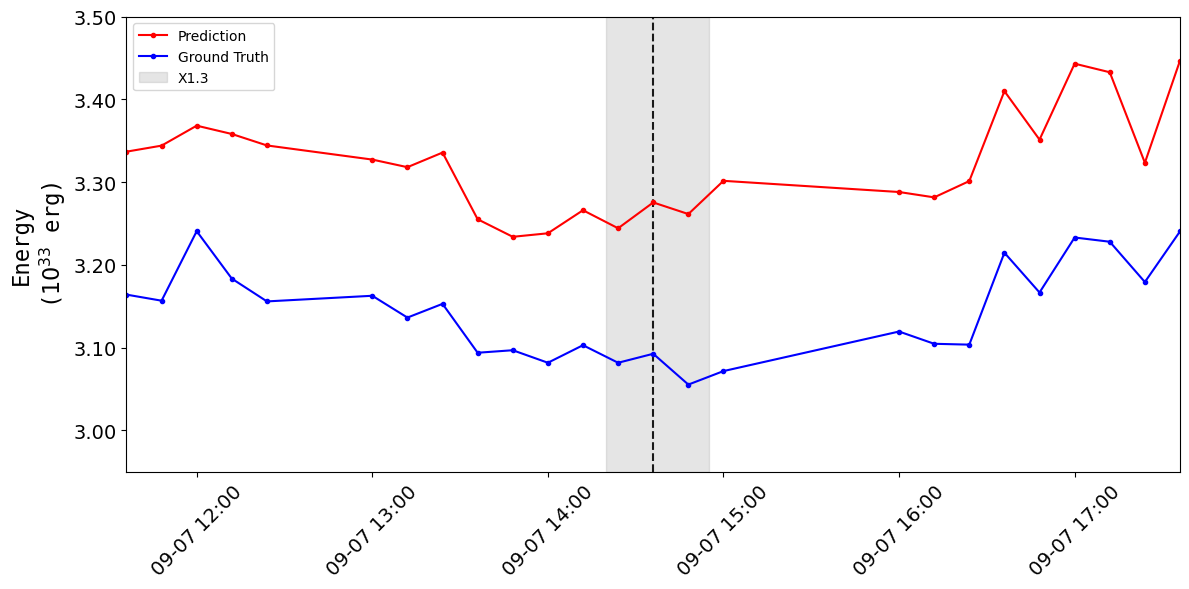

In [45]:
title = "NOAA 12673"
ylim = [2.95, 3.5]

ss = X_flares.iloc[2]

pt = pd.to_datetime(ss['event_peaktime'])
st = pd.to_datetime(ss['event_starttime'])
et = pd.to_datetime(ss['event_endtime'])
cl = ss['fl_goescls']

dt = timedelta(hours=3)

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_unit'] * energy_factor
ref_E = df['ref_E_unit'] * energy_factor

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([pt-dt, pt+dt])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# labeltime = timedelta(seconds=10)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
ax.axvline(pt, linestyle='--', zorder=0, color='black')
ax.axvspan(st, et, color='gray', alpha=0.2, label=cl)
    # ax.annotate(cl[0], xy=(et+labeltime, 1.22))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy_small.png', dpi=600)

In [55]:
pred_free_E.iloc[98]

0.589978603210993

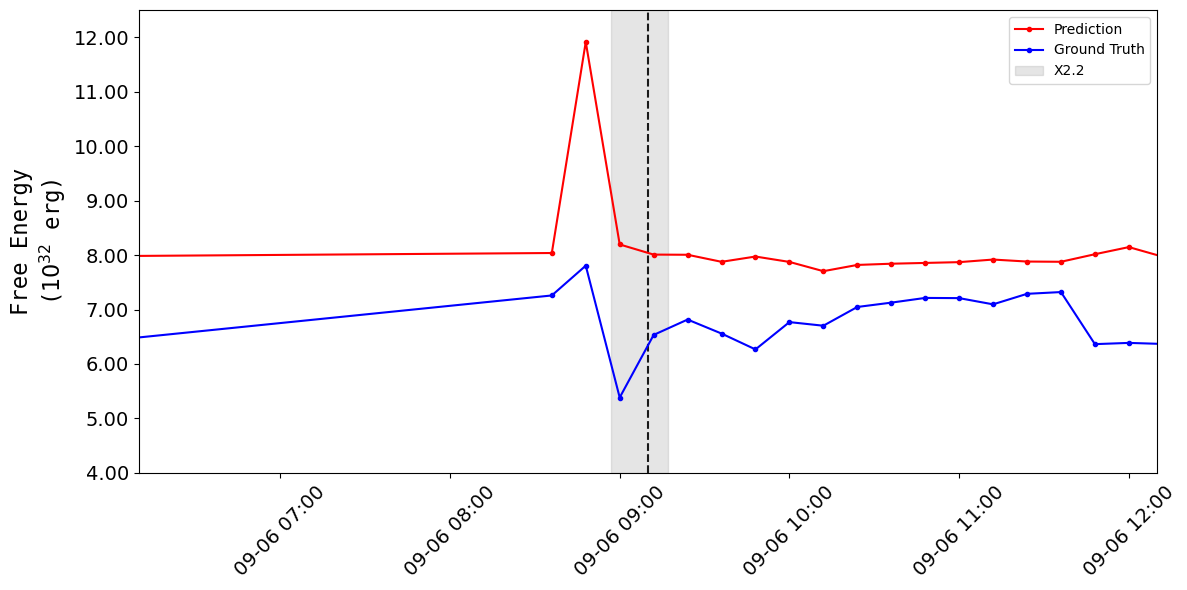

In [56]:
title = "NOAA 12673"
ylim = [4.0, 12.5]

ss = X_flares.iloc[0]

pt = pd.to_datetime(ss['event_peaktime'])
st = pd.to_datetime(ss['event_starttime'])
et = pd.to_datetime(ss['event_endtime'])
cl = ss['fl_goescls']

dt = timedelta(hours=3)

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_unit'] * energy_factor
ref_E = df['ref_E_unit'] * energy_factor
pot_E = df['pot_E_unit'] * energy_factor
pred_free_E = pred_E - pot_E
ref_free_E = ref_E - pot_E

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_free_E*10,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_free_E*10,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([pt-dt, pt+dt])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Free Energy\n($10^{32}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# labeltime = timedelta(seconds=10)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
ax.axvline(pt, linestyle='--', zorder=0, color='black')
ax.axvspan(st, et, color='gray', alpha=0.2, label=cl)
    # ax.annotate(cl[0], xy=(et+labeltime, 1.22))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy_small.png', dpi=600)

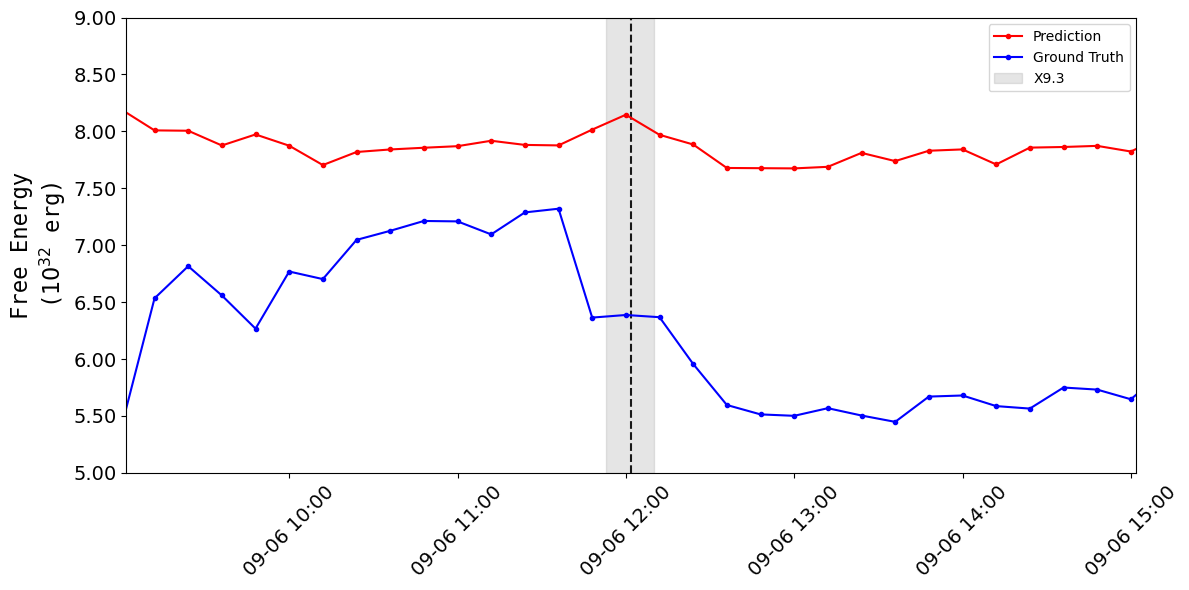

In [59]:
title = "NOAA 12673"
ylim = [5.0, 9.0]

ss = X_flares.iloc[1]

pt = pd.to_datetime(ss['event_peaktime'])
st = pd.to_datetime(ss['event_starttime'])
et = pd.to_datetime(ss['event_endtime'])
cl = ss['fl_goescls']

dt = timedelta(hours=3)

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_unit'] * energy_factor
ref_E = df['ref_E_unit'] * energy_factor
pot_E = df['pot_E_unit'] * energy_factor
pred_free_E = pred_E - pot_E
ref_free_E = ref_E - pot_E

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_free_E*10,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_free_E*10,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([pt-dt, pt+dt])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Free Energy\n($10^{32}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# labeltime = timedelta(seconds=10)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
ax.axvline(pt, linestyle='--', zorder=0, color='black')
ax.axvspan(st, et, color='gray', alpha=0.2, label=cl)
    # ax.annotate(cl[0], xy=(et+labeltime, 1.22))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy_small.png', dpi=600)

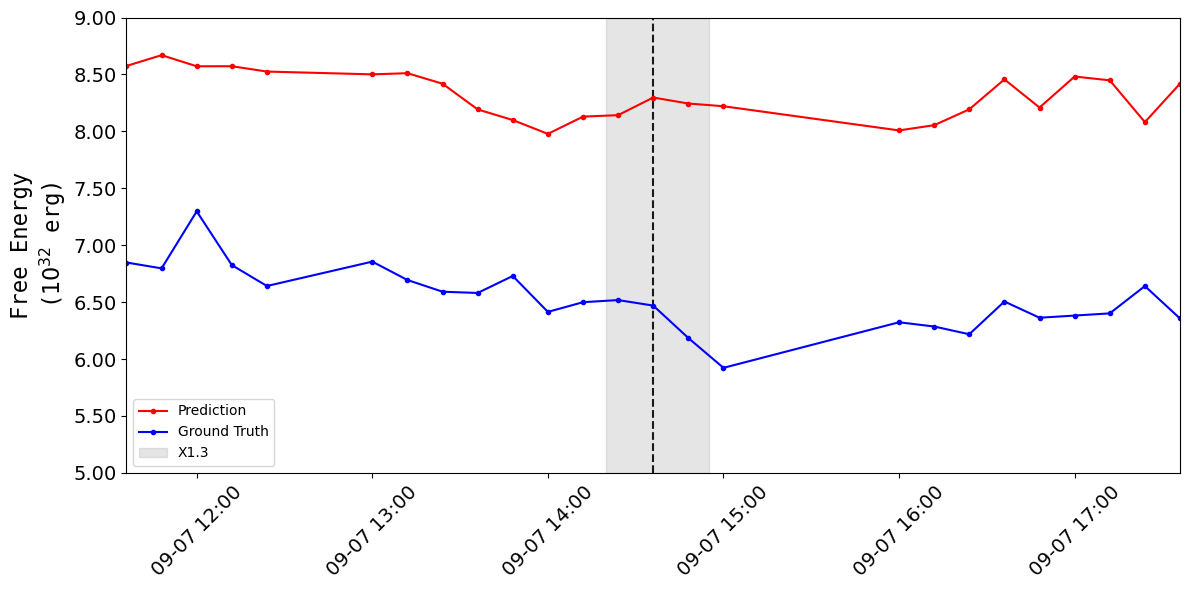

In [73]:
title = "NOAA 12673"
ylim = [5.0, 9.0]

ss = X_flares.iloc[2]

pt = pd.to_datetime(ss['event_peaktime'])
st = pd.to_datetime(ss['event_starttime'])
et = pd.to_datetime(ss['event_endtime'])
cl = ss['fl_goescls']

dt = timedelta(hours=3)

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_unit'] * energy_factor
ref_E = df['ref_E_unit'] * energy_factor
pot_E = df['pot_E_unit'] * energy_factor
pred_free_E = pred_E - pot_E
ref_free_E = ref_E - pot_E

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_free_E*10,'o', **marker_style, color='red', label='Prediction')
ax.plot(obstime, ref_free_E*10,'o', **marker_style, color='blue', label='Ground Truth')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([pt-dt, pt+dt])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Free Energy\n($10^{32}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

# labeltime = timedelta(seconds=10)
# for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
ax.axvline(pt, linestyle='--', zorder=0, color='black')
ax.axvspan(st, et, color='gray', alpha=0.2, label=cl)
    # ax.annotate(cl[0], xy=(et+labeltime, 1.22))
# plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(result_path / 'energy_small.png', dpi=600)

# aaa

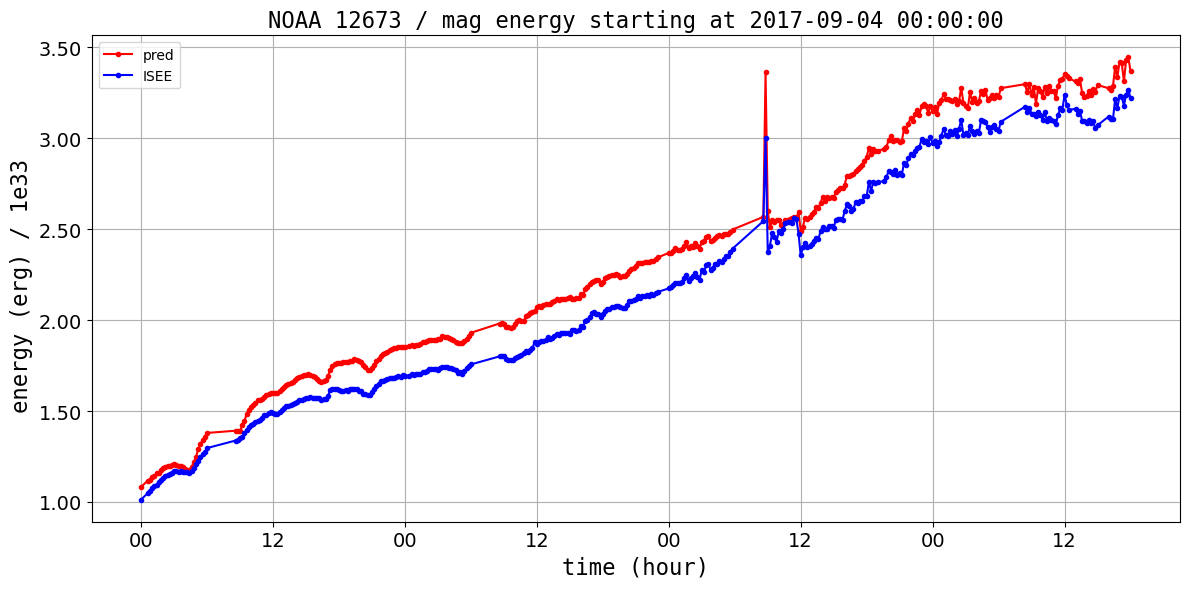

In [10]:
title = "NOAA 12673"
ylim = None
hour = 3

obstime = df['obstime']
pred_E = df['pred_E_1e33']
ref_E = df['ref_E_1e33']

obstime = pd.to_datetime(obstime).to_list()
pred_E = pred_E.to_list()
ref_E = ref_E.to_list()

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='pred')
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='ISEE')

# format the x-axis with universal time
locator = AutoDateLocator()
# locator.intervald[HOURLY] = [hour] # only show every 3 hours
formatter = DateFormatter('%H')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('energy (erg) / 1e33 ',**text_style)
ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'energy.png', dpi=600)

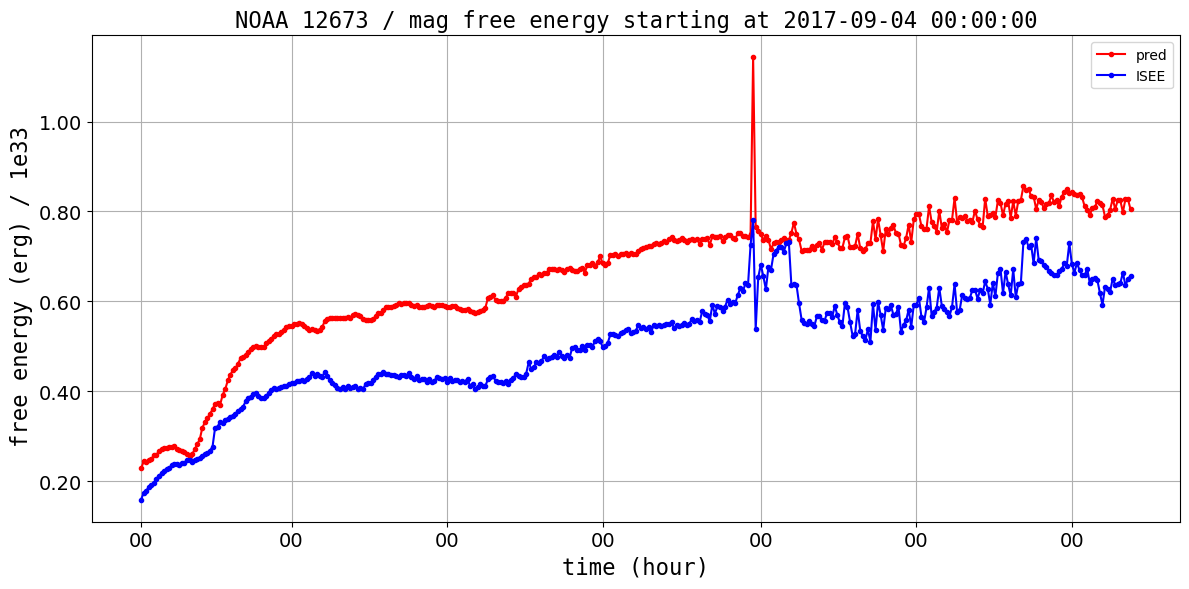

In [11]:
title = "NOAA 12673"
ylim = None
hour = 3

obstime = df['obstime']
pot_E = df['pot_E_1e33']
pred_free_E = df['pred_E_1e33'] - pot_E
ref_free_E = df['ref_E_1e33'] - pot_E

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_free_E,'o', **marker_style, color='red', label='pred')
ax.plot(obstime, ref_free_E,'o', **marker_style, color='blue', label='ISEE')

# format the x-axis with universal time
locator = AutoDateLocator()
locator.intervald[HOURLY] = [hour] # only show every 3 hours
formatter = DateFormatter('%H')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('free energy (erg) / 1e33 ',**text_style)
ax.set_title(f'{title} / mag free energy starting at {str(obstime.iloc[0])}',**text_style)
ax.set_ylim(ylim)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'free_energy.png', dpi=600)